<a href="https://colab.research.google.com/github/Many98/GLM_R2Py/blob/main/Python/01ZLMA_ex07_Binary_Data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 07 of the course 01ZLMA. 

# GLM for Discrete response - Binary Data Analysis

Alternative and Binomial responses

**Bernoulli (Alternative) Model**

$$Y_{i,j} \sim Be(\pi_i) \ i = 1,\ldots,K \ \text{and} \ j = 1,\ldots, n_i.$$
$K$ is number of groups, $n_i$ is number of observations in group $i$ and $\sum_{i=1}^{K} = N$
$$ E[Y_{i,j}] = \pi_i \ \text{and} \ g(\pi_i) = \eta_i =x_i^T \beta $$


**Binomial Model**
$$Y_i = \sum_{j=1}^{n_i} Y_{i,j} \sim Bi(n_i, \pi_i)$$

**Without continuos covariate (only factor variables)**

$K$ is constant and $n_i \rightarrow \infty $

**With at least one continuos covariate**

$n_i \approx 1$ ( $n_i$ is small enough) and $K \rightarrow \infty$



## Link functions for binary data

**Logistic function:**

The logistic function is the canonical link function for binary responses, and it is CDF of the standard logistic distribution.

$$\pi_i = \frac{1}{1+e^{-x_i^T \beta}} $$ 


**Probit function:**

The CDF of the normal distribution. 
$$\pi_i = \Phi({x_i^T \beta}) $$ 


**Cauchit function:**

The CDF of the Cauchy distribution

$$\pi_i = \frac{1}{\pi}\text{arctan}(x_i^T \beta) + \frac{1}{2} $$ 


**Complementary log-log (cloglog) function:**

The inverse of the conditional log-log function (CDF of the Gumbel distribution)

$$\pi_i = 1 − e^{-e^{x_i^T \beta}}$$

The counter part of the cloglog function is log-log link function.

In [1]:
import numpy as np
import scipy
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.api import abline_plot

import pandas as pd

from dfply import *  # handy module to mimic R dplyr library

from helpers import Anova

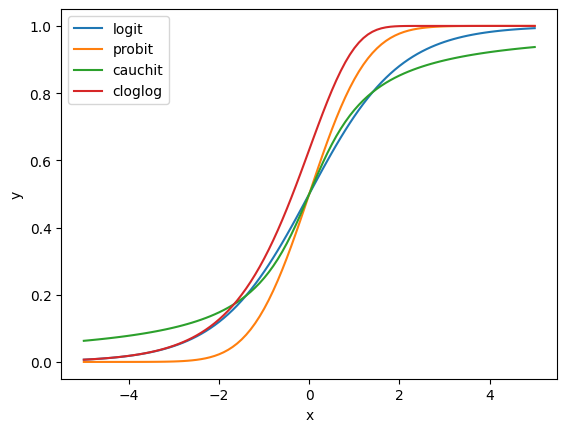

In [2]:
x = np.tile(np.linspace(-5, 5, 101), 4).reshape(4, -1)
y = []
names =[]

for i, j in enumerate(zip(("logit", "probit", "cauchit", "cloglog"), 
                (sm.genmod.families.links.Logit(), sm.genmod.families.links.probit(), 
                 sm.genmod.families.links.cauchy(), sm.genmod.families.links.CLogLog()))):
    
    y.append(j[1].inverse(x[i]))
    names.append([j[0]]*len(x[i]))
    
y = np.array(y).flatten()
n = np.array(names).flatten()

fig, ax = plt.subplots()



sns.lineplot(x='x', y='y', data=pd.DataFrame(data={'x': x.flatten(), 'y': y, 'n': n}), ax=ax, hue='n')
    

ax.legend()
plt.show()


## Logistic regression with Titanic dataset

https://www.kaggle.com/c/titanic/data

| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [3]:
X, y = datasets.fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

titanic_train = pd.concat([X_train, y_train], axis=1)
titanic_test = pd.concat([X_test, y_test], axis=1)

In [4]:
titanic_train

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
200,1.0,"McCaffry, Mr. Thomas Francis",male,46.0,0.0,0.0,13050,75.2417,C6,C,None,292.0,"Vancouver, BC",0
18,1.0,"Bazzani, Miss. Albina",female,32.0,0.0,0.0,11813,76.2917,D15,C,8,NaN,None,1
697,3.0,"Cacic, Miss. Marija",female,30.0,0.0,0.0,315084,8.6625,None,S,None,NaN,None,0
1004,3.0,"McDermott, Miss. Brigdet Delia",female,NaN,0.0,0.0,330932,7.7875,None,Q,13,NaN,None,1
983,3.0,"MacKay, Mr. George William",male,NaN,0.0,0.0,C.A. 42795,7.5500,None,S,None,NaN,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1.0,"Homer, Mr. Harry ('Mr E Haven')",male,35.0,0.0,0.0,111426,26.5500,None,C,15,NaN,"Indianapolis, IN",1
1002,3.0,"McCoy, Miss. Alicia",female,NaN,2.0,0.0,367226,23.2500,None,Q,16,NaN,None,1
1160,3.0,"Rouse, Mr. Richard Henry",male,50.0,0.0,0.0,A/5 3594,8.0500,None,S,None,NaN,None,0
195,1.0,"Maioni, Miss. Roberta",female,16.0,0.0,0.0,110152,86.5000,B79,S,8,NaN,None,1


In [5]:
titanic_train.describe(include = 'all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
count,1047.000000,1047,1047,834.000000,1047.000000,1047.000000,1047,1046.000000,232,1045,389,101.000000,602,1047
unique,NaN,1045,2,NaN,NaN,NaN,776,NaN,161,3,27,NaN,322,2
top,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY",0
freq,NaN,2,671,NaN,NaN,NaN,11,NaN,5,738,35,NaN,51,647
mean,2.305635,NaN,NaN,30.073042,0.521490,0.404967,NaN,31.994590,NaN,NaN,NaN,157.009901,NaN,NaN
std,0.826310,NaN,NaN,14.437330,1.089348,0.909002,NaN,47.653363,NaN,NaN,NaN,99.625749,NaN,NaN
min,1.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN
25%,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.925000,NaN,NaN,NaN,68.000000,NaN,NaN
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.458300,NaN,NaN,NaN,149.000000,NaN,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,258.000000,NaN,NaN


In [6]:
titanic_test.describe(include = 'all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
count,262.000000,262,262,212.000000,262.000000,262.000000,262,262.000000,63,262,97,20.000000,143,262
unique,NaN,262,2,NaN,NaN,NaN,239,NaN,55,3,19,NaN,104,2
top,NaN,"Carr, Miss. Jeannie",male,NaN,NaN,NaN,113781,NaN,B57 B59 B63 B66,S,D,NaN,"New York, NY",0
freq,NaN,1,172,NaN,NaN,NaN,4,NaN,3,176,10,NaN,13,162
mean,2.251908,NaN,NaN,29.126179,0.408397,0.305344,NaN,38.489106,NaN,NaN,NaN,180.000000,NaN,NaN
std,0.882729,NaN,NaN,14.328332,0.819545,0.659654,NaN,65.493474,NaN,NaN,NaN,87.060173,NaN,NaN
min,1.000000,NaN,NaN,0.750000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,9.000000,NaN,NaN
25%,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.883350,NaN,NaN,NaN,124.500000,NaN,NaN
50%,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,13.985400,NaN,NaN,NaN,169.000000,NaN,NaN
75%,3.000000,NaN,NaN,37.000000,1.000000,0.000000,NaN,30.646850,NaN,NaN,NaN,238.250000,NaN,NaN


In [7]:
# Number of NA's
print(titanic_train.isna().sum())
titanic_test.isna().sum()

pclass         0
name           0
sex            0
age          213
sibsp          0
parch          0
ticket         0
fare           1
cabin        815
embarked       2
boat         658
body         946
home.dest    445
survived       0
dtype: int64


pclass         0
name           0
sex            0
age           50
sibsp          0
parch          0
ticket         0
fare           0
cabin        199
embarked       0
boat         165
body         242
home.dest    119
survived       0
dtype: int64

We will modify train dataset for our academic purpose :-)

### Model where all covariates are discrete

for categorical data in pandas see https://pandas.pydata.org/docs/user_guide/categorical.html

In [8]:
data_dis = titanic_train[['survived','pclass','sex','embarked']]

# or use dfply module
#data_dis = titanic_train >> select(titanic_train.survived, titanic_train.pclass, titanic_train.sex,
#                                   titanic_train.embarked)
print(data_dis.dtypes)

# dfply does not have mutate_if func  just mutate :(
data_dis_ = data_dis.apply(lambda x: x.astype('category') if str(data_dis['pclass'].dtype) == 'str' else x)
print(data_dis_.dtypes)

# only pandas
data_dis = data_dis[data_dis.embarked.isin(('C', 'S', 'Q'))]  # filter
data_dis = data_dis.rename(columns = {'pclass':'class_'})  # rename
data_dis = data_dis.astype('category')  # `categorize` 

# pandas pipe functionality
data_dis2=(
     data_dis
    .pipe(lambda df: df['embarked'].isin(('C', 'S', 'Q')))  # filter
    .rename({'pclass':'class_'})  # rename
    .astype('category') # `categorize` 
)

# with pandas + dfply
data_dis3 = data_dis >> \
            filter_by(data_dis.embarked.isin(('C', 'S', 'Q')) )  >> \
            transmute(survived = data_dis.survived.astype('category'),
                      class_ = data_dis.class_.astype('category'),
                      sex = data_dis.sex.astype('category'),
                      embarked = data_dis.embarked.astype('category'))
  
  

print(data_dis.describe(include='all'))
data_dis.dtypes

survived    category
pclass       float64
sex         category
embarked    category
dtype: object
survived    category
pclass       float64
sex         category
embarked    category
dtype: object
       survived  class_   sex embarked
count      1045  1045.0  1045     1045
unique        2     3.0     2        3
top           0     3.0  male        S
freq        647   566.0   671      738


survived    category
class_      category
sex         category
embarked    category
dtype: object

In [9]:
data_dis

,survived,class_,sex,embarked
200,0,1.0,male,C
18,1,1.0,female,C
697,0,3.0,female,S
1004,1,3.0,female,Q
983,0,3.0,male,S
...,...,...,...,...
164,1,1.0,male,C
1002,1,3.0,female,Q
1160,0,3.0,male,S
195,1,1.0,female,S


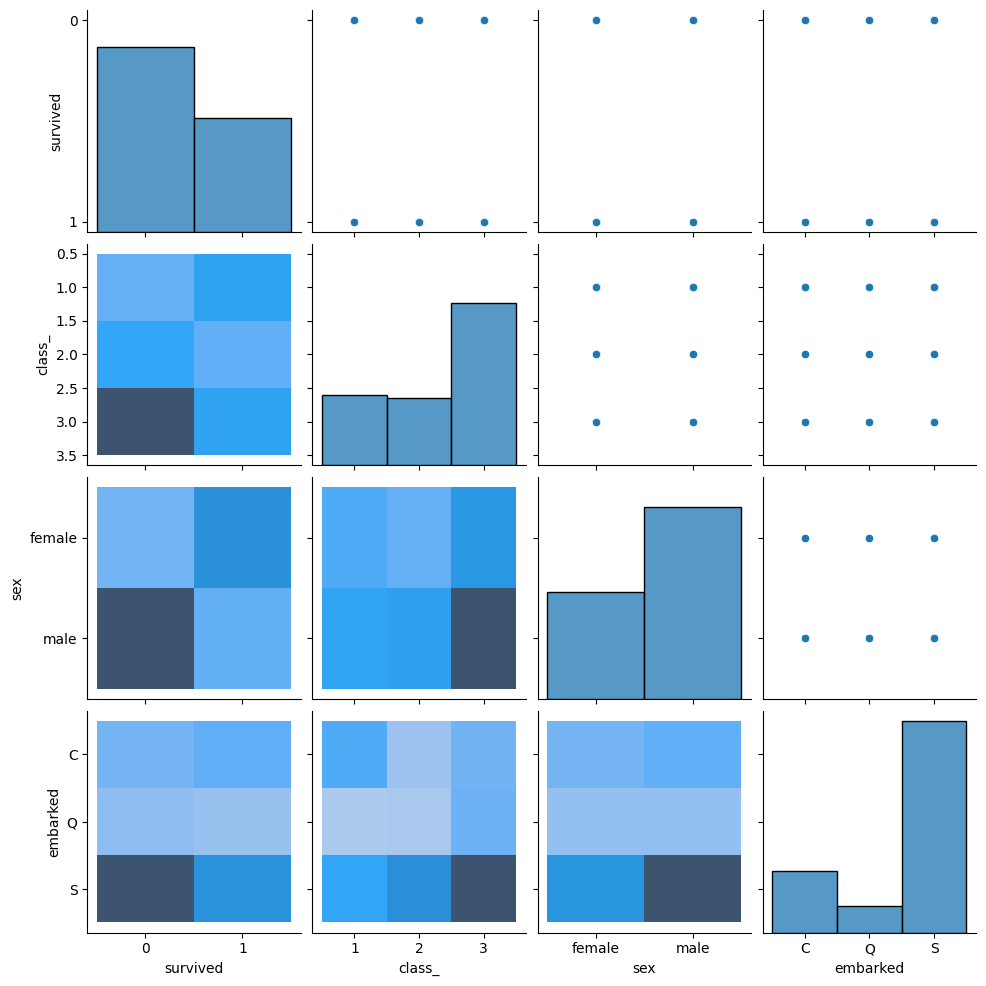

In [10]:
# TODO implementation of ggpairs like function pending

g = sns.pairplot(data=data_dis, vars=['survived', 'class_', 'sex','embarked'])
#g.map_diag(sns.kdeplot)
g.map_lower(sns.histplot)
#g.map_upper(sns.histplot)

In [11]:
pd.crosstab([data_dis.embarked, data_dis.sex, data_dis.survived], [data_dis.class_], margins=True)

class_                    1.0  2.0  3.0   All
embarked sex    survived                     
C        female 0           2    0    9    11
                1          56   10   17    83
         male   0          31   11   40    82
                1          22    4   13    39
Q        female 0           0    0   16    16
                1           1    2   27    30
         male   0           0    4   36    40
                1           0    0    6     6
S        female 0           2   10   65    77
                1          47   69   41   157
         male   0          60  110  251   421
                1          23   15   45    83
All                       244  235  566  1045

In [12]:
print(pd.crosstab([data_dis.survived], [data_dis.class_], margins=True))
print(pd.crosstab([data_dis.survived], [data_dis.class_], normalize='index'))
print(pd.crosstab([data_dis.survived], [data_dis.class_], normalize='columns'))

class_    1.0  2.0  3.0   All
survived                     
0          95  135  417   647
1         149  100  149   398
All       244  235  566  1045
class_         1.0       2.0       3.0
survived                              
0         0.146832  0.208655  0.644513
1         0.374372  0.251256  0.374372
class_         1.0       2.0       3.0
survived                              
0         0.389344  0.574468  0.736749
1         0.610656  0.425532  0.263251


In [13]:
# Count observations
print(pd.crosstab([data_dis.survived], [data_dis.sex], margins=True))
# Conditional proportions given rows
print(pd.crosstab([data_dis.survived], [data_dis.sex], normalize='index'))
# Conditional proportions given columns
print(pd.crosstab([data_dis.survived], [data_dis.sex], normalize='columns'))

sex       female  male   All
survived                    
0            104   543   647
1            270   128   398
All          374   671  1045
sex         female      male
survived                    
0         0.160742  0.839258
1         0.678392  0.321608
sex         female     male
survived                   
0         0.278075  0.80924
1         0.721925  0.19076


In [14]:
print(pd.crosstab([data_dis.survived], [data_dis.embarked], margins=True))
print(pd.crosstab([data_dis.survived], [data_dis.embarked], normalize='columns'))


embarked    C   Q    S   All
survived                    
0          93  56  498   647
1         122  36  240   398
All       215  92  738  1045
embarked         C         Q         S
survived                              
0         0.432558  0.608696  0.674797
1         0.567442  0.391304  0.325203


In [15]:
table_sex = pd.crosstab([data_dis.survived], [data_dis.sex], margins=True)
table_sex.iloc[0, 0]
table_sex

sex,female,male,All
survived,,,
0,104,543,647
1,270,128,398
All,374,671,1045


In [16]:
# Odss ratio (empirický poměr šancí)
def OR(df):
    return df.iloc[0, 0] / df.iloc[0, 1] / (df.iloc[1, 0] / df.iloc[1, 1])

table_sex = pd.crosstab([data_dis.survived], [data_dis.sex], margins=True)
print(table_sex)
print(f'Odds ratio: {OR(table_sex)}')
# Men have 

sex       female  male   All
survived                    
0            104   543   647
1            270   128   398
All          374   671  1045
Odds ratio: 0.09079871768637883


In [17]:
#install.packages("epitools")
#library(epitools)
#oddsratio.wald(table_sex, conf.level = 0.95)

#/TODO prepare for python/

In [18]:

c, p, dof, expected = scipy.stats.chi2_contingency(table_sex)
print(f'Statistic: {c} \n'
      f'Deg of freedom: {dof} \n'
      f'p value: {p}')

Statistic: 287.3307337939888 
Deg of freedom: 4 
p value: 5.851786717759912e-61


### Null model

* Compute the null model (assume that the probability of survival was the same for all passangers)

* How do we interpret estimated parameter?

## Note
endog (dependent var)for Binomial family in statsmodels can be specified in one of three ways: A 1d array of 0 or 1 values, indicating failure or success respectively. A 2d array, with two columns. The first column represents the success count and the second column represents the failure count. A 1d array of proportions, indicating the proportion of successes, with parameter var_weights containing the number of trials for each row.

In [19]:
# dependet variable in our case `survived` must be casted to float/int as required in statsmodels documentation
# for Binomial family https://www.statsmodels.org/dev/generated/statsmodels.genmod.families.family.Binomial.html#statsmodels.genmod.families.family.Binomial


data_dis['survived'] = data_dis['survived'].astype('float')

mod0=smf.glm(formula = 'survived~1', data=data_dis,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1044
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -694.39
Date:                Wed, 07 Sep 2022   Deviance:                       1388.8
Time:                        11:47:31   Pearson chi2:                 1.04e+03
No. Iterations:                     4   Pseudo R-squ. (CS):         -4.441e-16
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4859      0.064     -7.627      0.000      -0.611      -0.361
==============================================================================
"""

In [20]:
# The chances of survival according to training data.
print(np.exp(mod0.params[0]))

# The probability of survival.
print(np.exp(mod0.params[0])/(1+np.exp(mod0.params[0])))


0.6151468315301413
0.38086124401913957


### Model with variable: sex

* Compute the model with one covariate sex. 

* How can we interpret estiamted coefficients? 

* Did survival depend on gender (`sex`) ?

* Perform an appropriate tests.

* Did women have a better chance of survival? 


In [22]:
mod_sex=smf.glm(formula = 'survived~sex', data=data_dis,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod_sex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1043
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -548.07
Date:                Wed, 07 Sep 2022   Deviance:                       1096.1
Time:                        11:47:31   Pearson chi2:                 1.04e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2442
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9540      0.115      8.267      0.000       0.728       1.180
sex[T.male]    -2.3991      0.152    -15.828      0.000      -2.696      -2.102
===============================================================================
"""

Use deviance to test submodels `anova(model_1,model_2,test="Chisq")`.

In [23]:
# The chances of survival according to training data.
print(np.exp(mod_sex.params))
#sexmale:    0.08419973147842043

anova = Anova()
anova(mod_sex,mod0,test="Chisq")



Intercept      2.596154
sex[T.male]    0.090799
dtype: float64


,resid_df,resid_deviance,df,deviance,chi2,p_val
0,1043,1096.149884,NaN,NaN,NaN,NaN
1,1044,1388.771922,-1.0,-292.622038,292.622038,1.334279e-65


In [26]:
#Function to estimate OR with lower and upper limit of 95% CI for OR

def OR_coef(variable,model,CI):
    param = np.array(model.params)
    where = np.where(np.array(model.params.index) == variable)
    beta = param[where]
    se = np.sqrt(np.diag(model.cov_params().to_numpy()))[where]
    or_ = np.exp(beta)
    
    return pd.DataFrame(index=[variable], data={'OR': or_, 'LCL': np.exp(beta-1*scipy.stats.norm.ppf(CI/2 +0.5)*se)
                                              , 'UCL':np.exp(beta+ scipy.stats.norm.ppf(CI/2 +0.5)*se)})
OR_coef("sex[T.male]",mod_sex,0.95)

,OR,LCL,UCL
sex[T.male],0.090799,0.067463,0.122207


Compare with results obtained from contingency table.

### Your turn:

Estimate model with one covariate `class` and compute: 

1. Did survival depend on (`class`) ?

2. Perform an appropriate tests.

3. Compute odds ratios between classes.

4. Did passangers in second class have a better chance of survival than in third? 


In [27]:
#1. 

In [28]:
#2. 

In [29]:
#3.

In [30]:
#4.

### Model with all discrete covariates without interactions

In [31]:
# Simple Logistic Regression model with all discrete covariates without interactions

# to work with factor in statsmodels we need to first one-hot encode variables
one_hot = pd.get_dummies(data_dis.iloc[:, data_dis.columns != 'survived'],
                         columns=list(np.array(data_dis.columns)[data_dis.columns != 'survived']),
                    drop_first=True)
one_hot = sm.add_constant(one_hot) # add intercept
mod1=sm.GLM(endog=data_dis.survived, exog=one_hot,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1039
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -502.52
Date:                Wed, 07 Sep 2022   Deviance:                       1005.0
Time:                        11:47:31   Pearson chi2:                 1.08e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3073
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4523      0.234     10.502      0.000       1.995       2.910
class__2.0    -0.6506      0.229     -2.840      0.005      -1.100      -0.202
class__3.0    -1.4865      0.205     -7.260      0.000      -1.888      -1.085
sex_male      -2.4619      0.164    -15.001      0.000      -2.784      -2.140
embarked_Q    -0.4270      0.322     -1.325      0.185      -1.059       0.205
embarked_S    -0.7320      0.201     -3.633      0.000      -1.127      -0.337
==============================================================================
"""

Deviance tests to add/drop independent variables.

TODO /NOT IMPLEMENTED YET FOR PYTHON/ 

`drop1(model,test="Chisq")`

`add1(model,terms.to.add,test="Chisq")`

In [32]:
#drop1(mod1,test="Chisq")  # TODO


NameError: name 'drop1' is not defined

In [ ]:
# add1(mod0,survived~sex+class+embarked, test="Chisq") TODO


In [79]:
data_dis2 = data_dis.replace({'embarked': 'Q'}, 'C')

one_hot2 = pd.get_dummies(data_dis2.iloc[:, data_dis2.columns != 'survived'],
                         columns=list(np.array(data_dis2.columns)[data_dis2.columns != 'survived']),
                    drop_first=True)
one_hot2 = sm.add_constant(one_hot2) # add intercept

mod1=sm.GLM(endog=data_dis2.survived, exog=one_hot2,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1040
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -503.40
Date:                Wed, 07 Sep 2022   Deviance:                       1006.8
Time:                        19:35:50   Pearson chi2:                 1.09e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3062
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3558      0.220     10.713      0.000       1.925       2.787
class__2.0    -0.6962      0.226     -3.085      0.002      -1.139      -0.254
class__3.0    -1.5689      0.195     -8.041      0.000      -1.951      -1.186
sex_male      -2.4402      0.163    -14.999      0.000      -2.759      -2.121
embarked_S    -0.5952      0.173     -3.435      0.001      -0.935      -0.256
==============================================================================
"""

In [ ]:
#mod1=glm(survived~relevel(factor(sex),ref="male")+class+embarked,family=binomial(link = "logit"),data_dis2) 
#summary(mod1)  TODO



In [80]:
OR_coef("sex_male",mod1,0.95)

,OR,LCL,UCL
sex_male,0.08714,0.063348,0.119869


Interpret previous result:

* By how many percentage is the chance of survival lower for  men? 

* Interpret confidence intrval and its significance.


Lets try model with second order interactions.


In [ ]:
# add1(mod1,~.^2,test="Chisq") TODO

In [81]:

mod2_all=smf.glm(formula = 'survived~sex*embarked + sex*class_+class_*embarked', data=data_dis,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod2_all.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1031
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -476.45
Date:                Wed, 07 Sep 2022   Deviance:                       952.90
Time:                        19:36:53   Pearson chi2:                 1.05e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3410
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.7590      0.635      5.922      0.000       2.515       5.003
sex[T.male]                    -4.1550      0.634     -6.551      0.000      -5.398      -2.912
embarked[T.Q]                  16.8070   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
embarked[T.S]                  -0.9089      0.568     -1.601      0.109      -2.021       0.204
class_[T.2.0]                  -0.2656      0.887     -0.299      0.765      -2.005       1.473
class_[T.3.0]                  -3.1877      0.633     -5.036      0.000      -4.428      -1.947
sex[T.male]:embarked[T.Q]      -0.7184      0.710     -1.012      0.311      -2.109       0.673
sex[T.male]:embarked[T.S]       0.3865      0.499      0.775      0.438      -0.591       1.364
sex[T.male]:class_[T.2.0]      -0.2517      0.709     -0.355      0.723      -1.641       1.138
sex[T.male]:class_[T.3.0]       2.4985      0.595      4.196      0.000       1.331       3.665
class_[T.2.0]:embarked[T.Q]   -18.1118   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
class_[T.3.0]:embarked[T.Q]   -16.8350   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
class_[T.2.0]:embarked[T.S]    -0.5949      0.697     -0.853      0.394      -1.962       0.772
class_[T.3.0]:embarked[T.S]    -0.1160      0.469     -0.247      0.805      -1.036       0.804
===============================================================================================
"""

In [ ]:
# step(mod2_all)  TODO

In [82]:
mod2=smf.glm(formula = 'survived~sex*embarked + sex*class_', data=data_dis,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1035
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -476.97
Date:                Wed, 07 Sep 2022   Deviance:                       953.93
Time:                        19:37:03   Pearson chi2:                 1.06e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3404
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.8486      0.583      6.600      0.000       2.706       4.992
sex[T.male]                  -4.1707      0.626     -6.660      0.000      -5.398      -2.943
embarked[T.Q]                -0.0455      0.488     -0.093      0.926      -1.002       0.911
embarked[T.S]                -1.0330      0.406     -2.545      0.011      -1.829      -0.237
class_[T.2.0]                -0.8187      0.621     -1.318      0.188      -2.037       0.399
class_[T.3.0]                -3.2680      0.544     -6.008      0.000      -4.334      -2.202
sex[T.male]:embarked[T.Q]    -0.7632      0.696     -1.097      0.273      -2.127       0.601
sex[T.male]:embarked[T.S]     0.3801      0.472      0.806      0.420      -0.544       1.305
sex[T.male]:class_[T.2.0]    -0.1699      0.697     -0.244      0.807      -1.536       1.196
sex[T.male]:class_[T.3.0]     2.5211      0.595      4.240      0.000       1.356       3.687
=============================================================================================
"""

In [83]:
anova(mod2_all,mod2,test="Chisq")


,resid_df,resid_deviance,df,deviance,chi2,p_val
0,1031,952.895480,NaN,NaN,NaN,NaN
1,1035,953.934612,-4.0,-1.039132,1.039132,0.903805


Interpretation by OR in models with interactions is more complitacated, see Lecture notes.

Lets try model with merged factor levels.




In [84]:
data_dis3 = data_dis2.replace({'class_': 2}, 1)

data_dis3.class_.unique()

/media/emanuel/data/miniconda3/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


[1.0, 3.0]
Categories (2, float64): [1.0, 3.0]

In [85]:
mod2=smf.glm(formula = 'survived~sex*embarked + sex*class_', data=data_dis3,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1039
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -485.54
Date:                Wed, 07 Sep 2022   Deviance:                       971.08
Time:                        19:37:37   Pearson chi2:                 1.04e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3295
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.3669      0.369      9.127      0.000       2.644       4.090
sex[T.male]                  -4.1401      0.421     -9.826      0.000      -4.966      -3.314
embarked[T.S]                -1.0639      0.294     -3.621      0.000      -1.640      -0.488
class_[T.3.0]                -2.7784      0.326     -8.535      0.000      -3.416      -2.140
sex[T.male]:embarked[T.S]     0.4408      0.363      1.215      0.224      -0.270       1.151
sex[T.male]:class_[T.3.0]     2.3678      0.381      6.209      0.000       1.620       3.115
=============================================================================================
"""

In [90]:
mod3=smf.glm(formula = 'survived~sex*embarked + sex*class_+class_*embarked', data=data_dis3,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

print(mod3.summary())



anova(mod2,mod3,test="Chisq")


                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1038
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -484.59
Date:                Wed, 07 Sep 2022   Deviance:                       969.19
Time:                        19:38:51   Pearson chi2:                 1.06e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3307
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

,resid_df,resid_deviance,df,deviance,chi2,p_val
0,1039,971.080033,NaN,NaN,NaN,NaN
1,1038,969.185836,1.0,1.894196,1.894196,0.168729


## Model with continuous independent variable.


Discuss difference from models without continuous variable (again)!!!

In [47]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 200 to 671
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1047 non-null   float64 
 1   name       1047 non-null   object  
 2   sex        1047 non-null   category
 3   age        834 non-null    float64 
 4   sibsp      1047 non-null   float64 
 5   parch      1047 non-null   float64 
 6   ticket     1047 non-null   object  
 7   fare       1046 non-null   float64 
 8   cabin      232 non-null    object  
 9   embarked   1045 non-null   category
 10  boat       389 non-null    object  
 11  body       101 non-null    float64 
 12  home.dest  602 non-null    object  
 13  survived   1047 non-null   category
dtypes: category(3), float64(6), object(5)
memory usage: 101.6+ KB


In [48]:
       
data_con = titanic_train >> \
                select(titanic_train.survived, titanic_train.sex, titanic_train.embarked, titanic_train.fare,
                      titanic_train.pclass, titanic_train.age)

data_con = data_con.apply(lambda x: x.astype('category') if str(x.dtype) in ('object', 'str') else x) 

print(data_con.describe(include='all'))
print(data_con.info())

    
data_con = data_con >> \
            filter_by(data_con.embarked.isin(('C', 'S', 'Q')) )  >> \
            transmute(survived = data_con.survived.astype('float'), # cast to float beacause of statsmodels requirements
                      age = data_con.age,
                      fare = data_con.fare,
                      class_ = data_con.pclass.astype('category'),
                      sex = data_con.sex.astype('category'),
                      embarked = data_con.embarked.astype('category'))

data_con = data_con.dropna(axis=0, how='any')

print(data_con.describe(include='all'))          
data_con.info()

       survived   sex embarked         fare       pclass         age
count      1047  1047     1045  1046.000000  1047.000000  834.000000
unique        2     2        3          NaN          NaN         NaN
top           0  male        S          NaN          NaN         NaN
freq        647   671      738          NaN          NaN         NaN
mean        NaN   NaN      NaN    31.994590     2.305635   30.073042
std         NaN   NaN      NaN    47.653363     0.826310   14.437330
min         NaN   NaN      NaN     0.000000     1.000000    0.166700
25%         NaN   NaN      NaN     7.925000     2.000000   21.000000
50%         NaN   NaN      NaN    14.458300     3.000000   28.000000
75%         NaN   NaN      NaN    31.275000     3.000000   39.000000
max         NaN   NaN      NaN   512.329200     3.000000   80.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 200 to 671
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    ----------

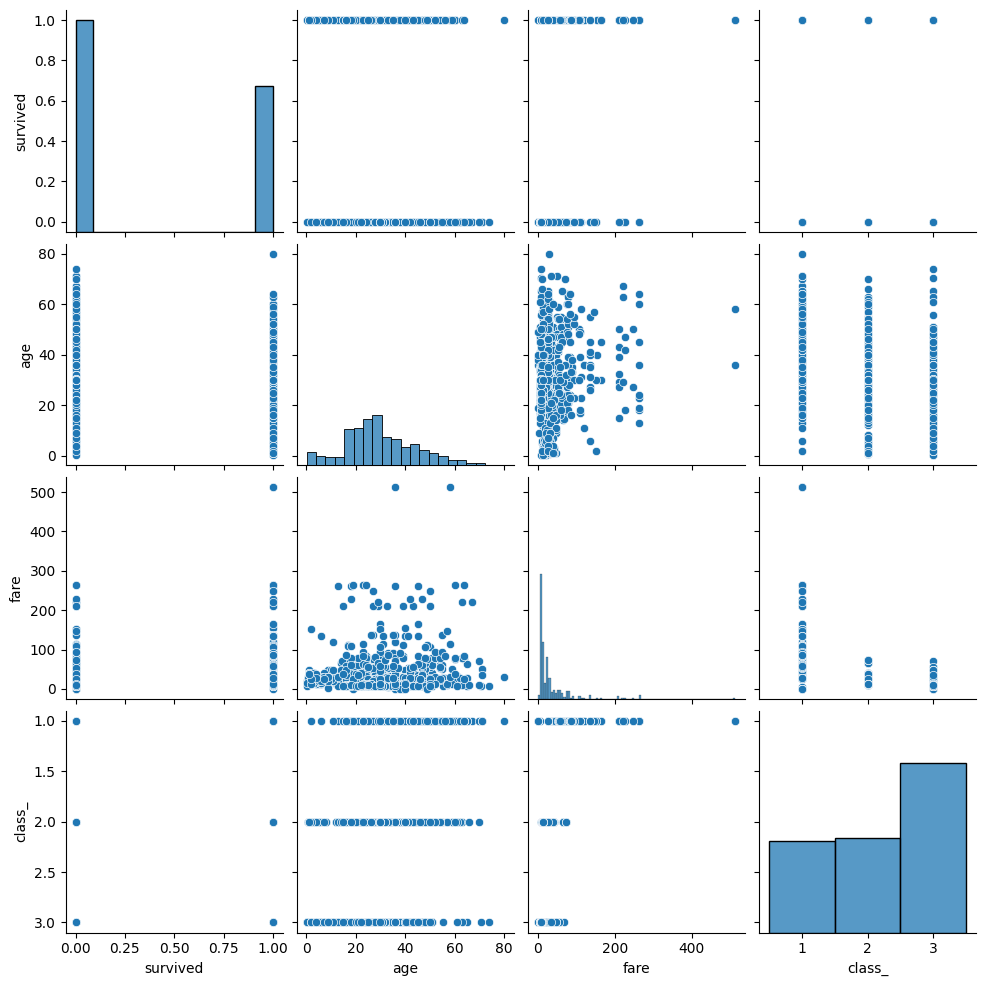

In [49]:
g = sns.pairplot(data=data_con, vars=['survived', 'age','fare','class_'])
#g.map_diag(sns.histplot)
#g.map_lower(sns.histplot)
#g.map_upper(sns.boxplot)

# TODO It needs define own functionality based on PairGrid which will distinguish categorical vs categorical
# categorical vs quantitative and quantitaive vs quantitative variables

Text(0.5, 1.0, 'Gender boxplot')

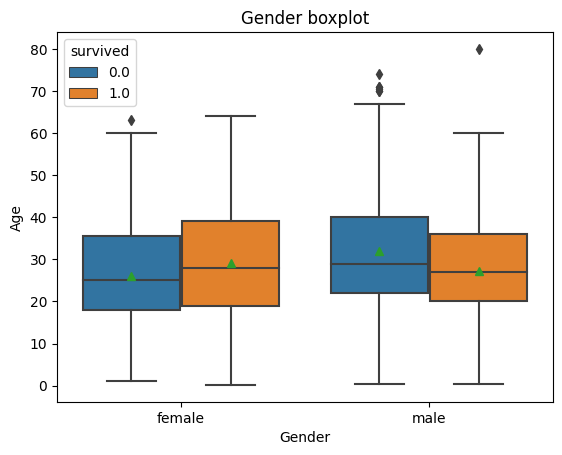

In [50]:
fig, ax = plt.subplots()
sns.boxplot(x='sex', y='age', hue='survived', ax = ax, data=data_con, showmeans=True)
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_title('Gender boxplot')

/media/emanuel/data/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
/media/emanuel/data/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Class x Fare')

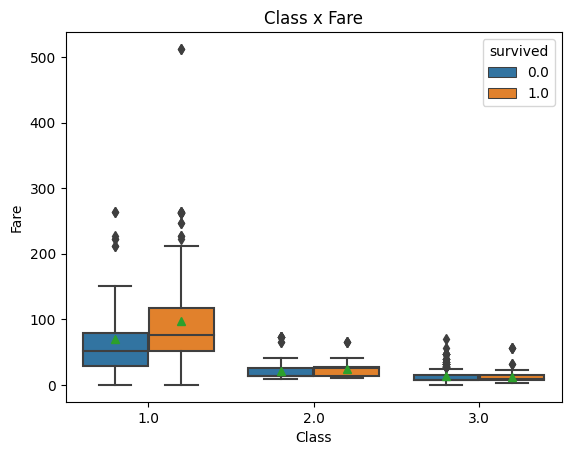

In [91]:
fig, ax = plt.subplots()
sns.boxplot(x='class_', y='fare', hue='survived', ax = ax, data=data_con, showmeans=True)
ax.set_xlabel('Class')
ax.set_ylabel('Fare')
ax.set_title('Class x Fare')

Continuous variable as factor

In [92]:
data_con_fac = data_con >> \
  mutate(age = pd.cut(data_con.age,(-np.inf, 15, 50, np.inf), labels=["child","adult","senior"]))
data_con_fac

,survived,age,fare,class_,sex,embarked
200,0.0,adult,75.2417,1.0,male,C
18,1.0,adult,76.2917,1.0,female,C
697,0.0,adult,8.6625,3.0,female,S
904,0.0,adult,7.8958,3.0,male,S
1236,1.0,child,9.2250,3.0,male,S
...,...,...,...,...,...,...
245,1.0,adult,86.5000,1.0,female,S
164,1.0,adult,26.5500,1.0,male,C
1160,0.0,adult,8.0500,3.0,male,S
195,1.0,adult,86.5000,1.0,female,S


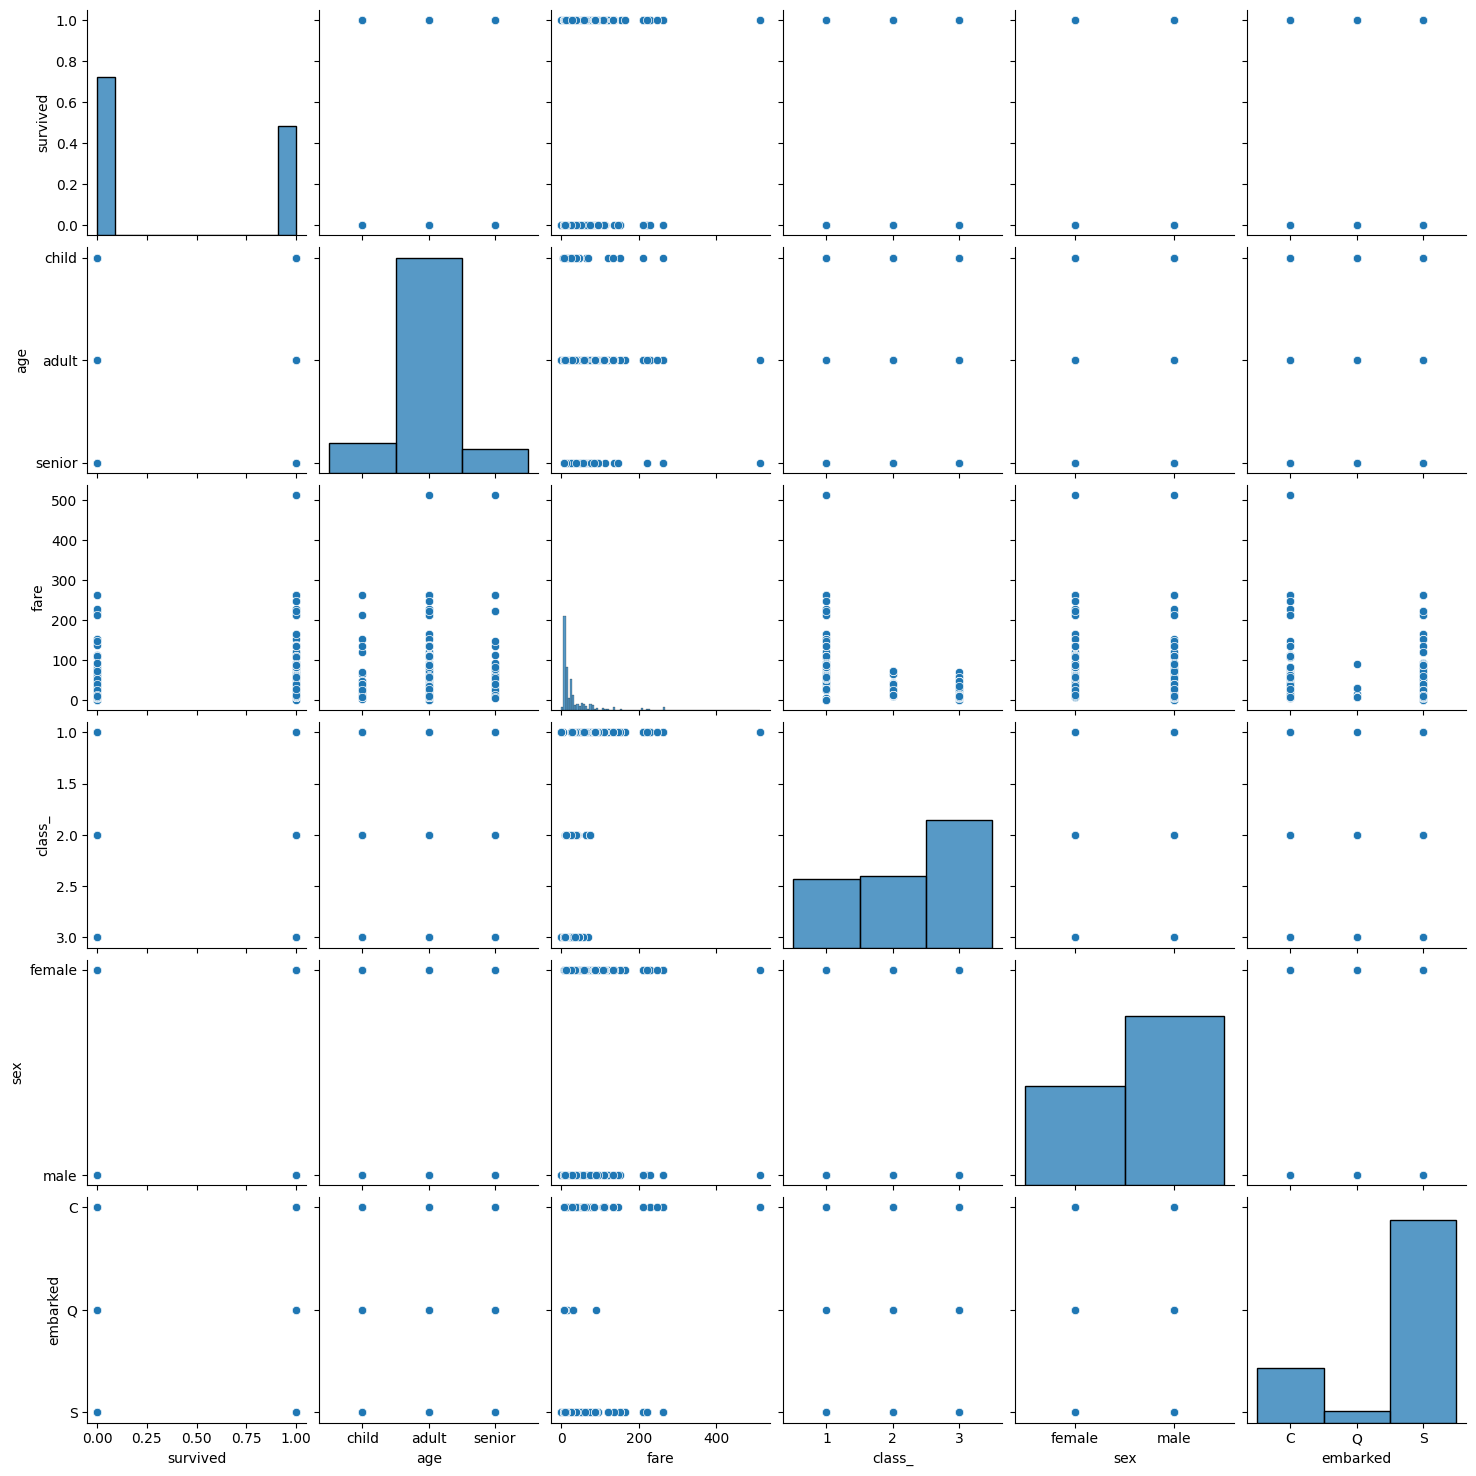

In [93]:
g = sns.pairplot(data=data_con_fac, vars=list(data_con_fac.columns))  # TODO needs custom implementation


In [94]:

mod_0= smf.glm(formula = 'survived~1', data=data_con_fac,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

print(mod_0.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  831
Model:                            GLM   Df Residuals:                      830
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -561.84
Date:                Wed, 07 Sep 2022   Deviance:                       1123.7
Time:                        19:40:15   Pearson chi2:                     831.
No. Iterations:                     4   Pseudo R-squ. (CS):         -4.441e-16
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3725      0.071     -5.277      0.0

In [95]:

mod_age_fac = smf.glm(formula = 'survived~age', data=data_con_fac,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

print(mod_age_fac.summary())

np.exp(mod_age_fac.params)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  831
Model:                            GLM   Df Residuals:                      828
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -555.82
Date:                Wed, 07 Sep 2022   Deviance:                       1111.6
Time:                        19:40:17   Pearson chi2:                     831.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01439
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3067      0.211      1.454

Intercept        1.358974
age[T.adult]     0.469421
age[T.senior]    0.422722
dtype: float64

Is the chance decreasing with increasing age?

In [96]:
anova(mod_age_fac,mod_0,test="Chisq")



,resid_df,resid_deviance,df,deviance,chi2,p_val
0,828,1111.633978,NaN,NaN,NaN,NaN
1,830,1123.679589,-2.0,-12.045611,12.045611,0.002423


In [97]:

mod_age = smf.glm(formula = 'survived~np.divide(age, 10)', data=data_con,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()
print(mod_age.summary())
np.exp(mod_age.params)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  831
Model:                            GLM   Df Residuals:                      829
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -558.97
Date:                Wed, 07 Sep 2022   Deviance:                       1117.9
Time:                        19:40:49   Pearson chi2:                     831.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.006873
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0192      0

Intercept             0.980935
np.divide(age, 10)    0.888052
dtype: float64

Question:

* With increasing age by 10 years, chance to survive decreased by 11%. 

* What do you think about causality in this result?

In [98]:
anova(mod_age,mod_0,test="Chisq")


,resid_df,resid_deviance,df,deviance,chi2,p_val
0,829,1117.948230,NaN,NaN,NaN,NaN
1,830,1123.679589,-1.0,-5.731359,5.731359,0.016665


Question:

* Can we compare by deviance test models `mod_age` and `mod_age_fac`?
* Which model do you prefere and why?
* For which approach (factorized or continuous) saturated model is useful and why?


In [ ]:

#mod_sat_fac = smf.glm(formula = 'survived~sex*age*embarked*class_', data=data_con >> \
#                          mutate(age=data_con.age.astype('category'),
#                                 fare=data_con.fare.astype('category')),
#                family=sm.families.Binomial(sm.families.links.Logit())).fit()
#mod_sat_fac.summary()

Your turn:

Consider a model with continuos variables `age`, `fare`, and any factor variable. 

* Create factor `child`, which takes values 1 (child) and 0 (adult).
* Create factor from varaible `fare`, where each level break is by 10 pounds.
* Estimate a model, where the chance of survival depends on factorized `fare` and `sex` and `child`.
* What percentage is the chance of survival lower for adult compare to child? 
* Depends the probability of survival on fare? Test it.
* Assume that the chance of survival increases with exponential increasig fare. How the chance of survival increased if the person spent an extra 10 pound for a ticket? 
* Build a model where the probabilty of survival depends on both `age` and `fare`. Are both covariates significant?
* 

Next Exercises (8 and 9):

* Logistic regression and binary classification (ROC, accuracy, ...)
* Residual analysis
* Prediction and confidence intervals
* Logistic regression and ML approach

